Tuning Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best score for Decision Tree: 0.5664927955962248

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.581253658686878

Tuning Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best score for Naive Bayes: 0.5177700752790871

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.5781031313224677

Evaluating Decision Tree...
              precision    recall  f1-score   support

        draw       0.00      0.00      0.00        66
        mate       0.49      0.10      0.17       526
   outoftime       0.00      0.00      0.00       146
      resign       0.61      0.98      0.75      1007

    accuracy                           0.60      1745


c:\Users\Kshitish Pandit\Desktop\Chess\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\Desktop\Chess\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\Desktop\Chess\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

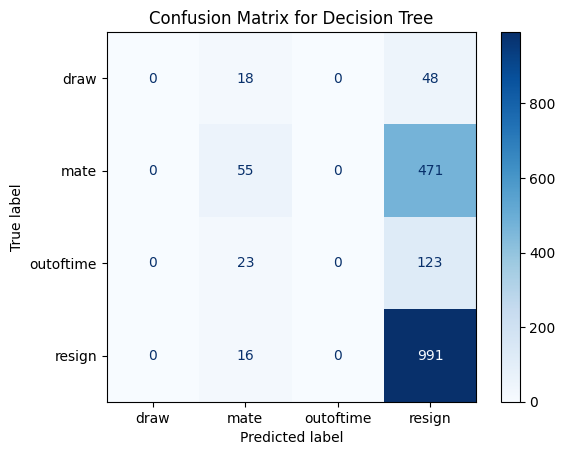

Evaluating Logistic Regression...
              precision    recall  f1-score   support

        draw       1.00      0.02      0.03        66
        mate       0.46      0.24      0.31       526
   outoftime       0.63      0.20      0.30       146
      resign       0.63      0.89      0.73      1007

    accuracy                           0.60      1745
   macro avg       0.68      0.33      0.34      1745
weighted avg       0.59      0.60      0.54      1745



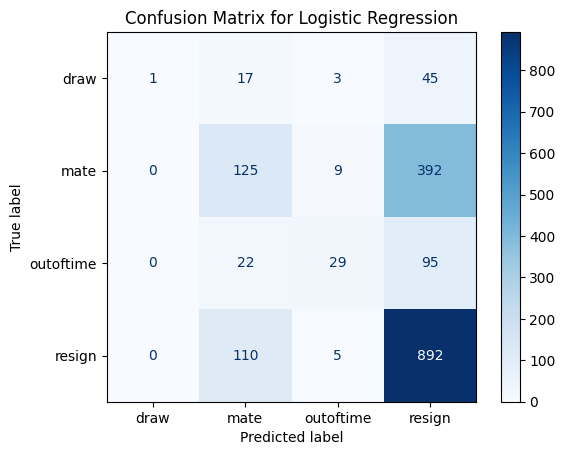

Evaluating Naive Bayes...
              precision    recall  f1-score   support

        draw       0.18      0.15      0.17        66
        mate       0.47      0.14      0.22       526
   outoftime       0.26      0.65      0.37       146
      resign       0.67      0.77      0.71      1007

    accuracy                           0.55      1745
   macro avg       0.39      0.43      0.37      1745
weighted avg       0.55      0.55      0.51      1745



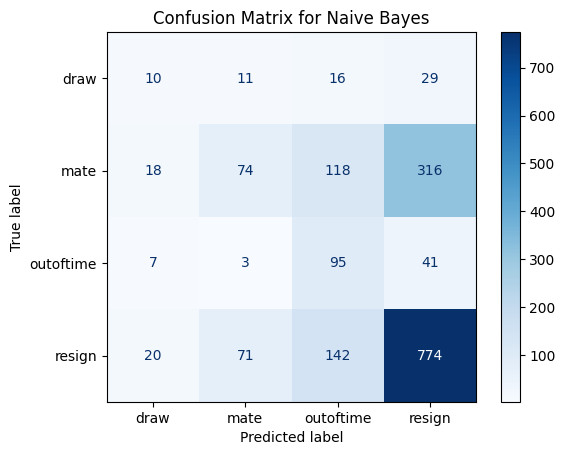

Evaluating Random Forest...
              precision    recall  f1-score   support

        draw       0.00      0.00      0.00        66
        mate       0.47      0.21      0.29       526
   outoftime       0.56      0.03      0.06       146
      resign       0.62      0.93      0.74      1007

    accuracy                           0.60      1745
   macro avg       0.41      0.29      0.27      1745
weighted avg       0.55      0.60      0.52      1745



c:\Users\Kshitish Pandit\Desktop\Chess\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\Desktop\Chess\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kshitish Pandit\Desktop\Chess\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

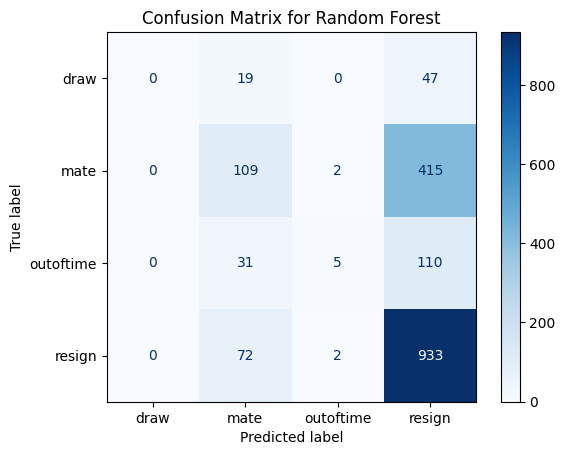

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('Data1.csv')

# Separate features and target
X = data.drop(columns=['Rated_(T/F)', 'Winner', 'Game_Status'])
y = data['Game_Status']

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction (optional)
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define models and hyperparameters
models = [
    {"name": "Decision Tree", "model": DecisionTreeClassifier(), "params": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10], "criterion": ["gini", "entropy"]}},
    {"name": "Logistic Regression", "model": LogisticRegression(max_iter=1000), "params": {"penalty": ["l1", "l2"], "C": [0.1, 1, 10], "solver": ["liblinear"]}},
    {"name": "Naive Bayes", "model": GaussianNB(), "params": {"var_smoothing": [1e-9, 1e-8, 1e-7]}},
    {"name": "Random Forest", "model": RandomForestClassifier(), "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}},
]

# Perform grid search for each model
best_models = {}
for model in models:
    print(f"Tuning {model['name']}...")
    grid_search = GridSearchCV(model["model"], model["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model['name']] = grid_search.best_estimator_
    print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
    print(f"Best score for {model['name']}: {grid_search.best_score_}\n")

# Evaluate each model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Game Status Model Performance Analysis

## 1.  *Decision Tree:*
- **True Positives**: High accuracy for black and white classes.
- **False Negatives**: Significant misclassification of draws.
- **Overall Performance**: The model performs well for black and white but struggles with draws.

## 2.  *Logistic Regression:*
- **True Positives**: Good performance for black and white.
- **False Negatives**: Notable misclassification of draws.
- **Overall Performance**: Slightly less effective than the Decision Tree for black and white.

## 3.  *Naive Bayes:*
- **True Positives**: Good performance for black and white, but with more misclassifications for draws.
- **Overall Performance**: Similar to Logistic Regression, but with a higher number of misclassifications for draws.

## 4.  *Random Forest:*
- **True Positives**: Highest accuracy for black and white.
- **False Negatives**: Misclassification of draws is lower than in previous models.
- **Overall Performance**: This model appears to be the most balanced, with fewer misclassifications across all classes.

## Summary of Performance:
- **Best Performing Model**: Random Forest shows the best overall performance with the least misclassifications.
- **Common Misclassifications**: All models struggle with correctly predicting draws, indicating a potential area for improvement.
- **Model Comparison**: Decision Tree and Random Forest generally outperform Logistic Regression and Naive Bayes in terms of true positives for black and white classes.
